In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/patient-treatment-classification/data-ori.csv
/kaggle/input/patient-treatment-classification/Data Set Information.docx


# **Patient Treatment Classification**

## **Problem Defined** 

 The data set is a electronic health record of patiets in a hospital containing labortary test results.
 
 Our task is to predict if a given patient will be in patient or out patiet.

### **Data Attributes** 

HAEMATOCRIT :     Patient laboratory test result of haematocrit

HAEMOGLOBINS:     Patient laboratory test result of haemoglobins

ERYTHROCYTE :     Patient laboratory test result of erythrocyte

LEUCOCYTE   :     Patient laboratory test result of leucocyte

THROMBOCYTE :     Patient laboratory test result of thrombocyte

MCH         :     Patient laboratory test result of MCH

MCHC        :     Patient laboratory test result of MCHC

MCV         :     Patient laboratory test result of MCV

AGE         :     Patient age

SEX         :     Patient gender

SOURCE      :     The class target in.= in care patient, out = out care patient

### **Import Required Modules**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, f1_score

import warnings
warnings.filterwarnings(action='ignore')

### **Load Data**

In [3]:
data = pd.read_csv('/kaggle/input/patient-treatment-classification/data-ori.csv')
data.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out


In [4]:
data.shape

(4412, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 379.3+ KB


In [6]:
data.isna().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [7]:
data.nunique()

HAEMATOCRIT     326
HAEMOGLOBINS    128
ERYTHROCYTE     433
LEUCOCYTE       276
THROMBOCYTE     554
MCH             189
MCHC            105
MCV             406
AGE              95
SEX               2
SOURCE            2
dtype: int64

In [8]:
data.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,38.197688,12.741727,4.541260,8.718608,257.524479,28.234701,33.343042,84.612942,46.626473
std,5.974784,2.079903,0.784091,5.049041,113.972365,2.672639,1.228664,6.859101,21.731218
min,13.700000,3.800000,1.480000,1.100000,8.000000,14.900000,26.000000,54.000000,1.000000
25%,34.375000,11.400000,4.040000,5.675000,188.000000,27.200000,32.700000,81.500000,29.000000
50%,38.600000,12.900000,4.570000,7.600000,256.000000,28.700000,33.400000,85.400000,47.000000
75%,42.500000,14.200000,5.050000,10.300000,321.000000,29.800000,34.100000,88.700000,64.000000
max,69.000000,18.900000,7.860000,76.600000,1183.000000,40.800000,39.000000,115.600000,99.000000


### **EDA**

In [9]:
data['SOURCE'] = data.SOURCE.replace({"in":1, 'out':0})

In [10]:
data.SOURCE.value_counts()

0    2628
1    1784
Name: SOURCE, dtype: int64

<AxesSubplot:>

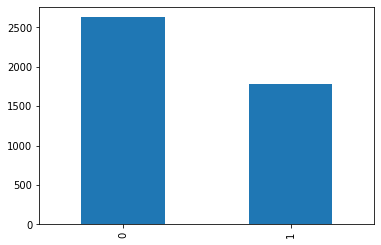

In [11]:
data.SOURCE.value_counts().plot(kind='bar')

In [12]:
data.SEX.value_counts()

M    2290
F    2122
Name: SEX, dtype: int64

<AxesSubplot:>

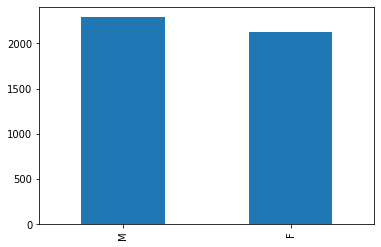

In [13]:
data.SEX.value_counts().plot(kind='bar')

In [14]:
feat = [f for f in data.columns if f !='SOURCE']
# Split df into X and y
y = data['SOURCE']
x = data.drop('SOURCE', axis=1)

In [15]:
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns")

num_feat = [f for f in feat if data[f].dtype != object]
cat_feat = [f for f in feat if data[f].dtype == object]

print(f"Total number of features : {len(feat)}")
print(f"Number of numerical features : {len(num_feat)}")
print(f"Number of categorical features : {len(cat_feat)}\n")

The dataset contains 4412 rows and 11 columns
Total number of features : 10
Number of numerical features : 9
Number of categorical features : 1



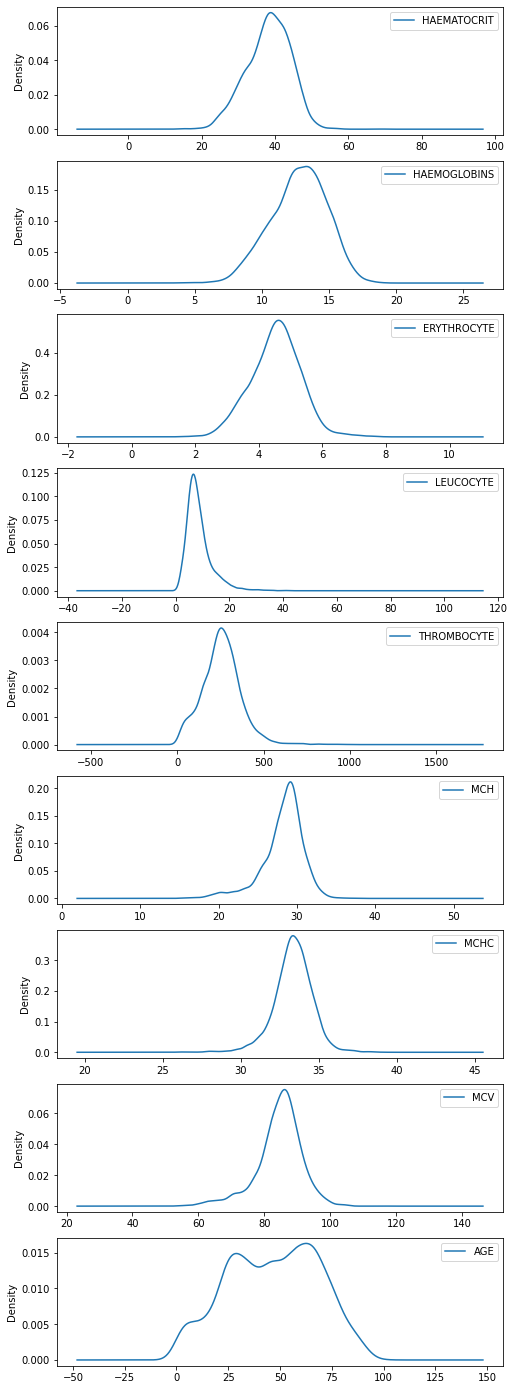

In [16]:
fig, axes = plt.subplots(9, 1, figsize=(8, 25))
for i, c in enumerate(num_feat):
    f = data[[c]].plot(kind='kde',ax=axes[i])

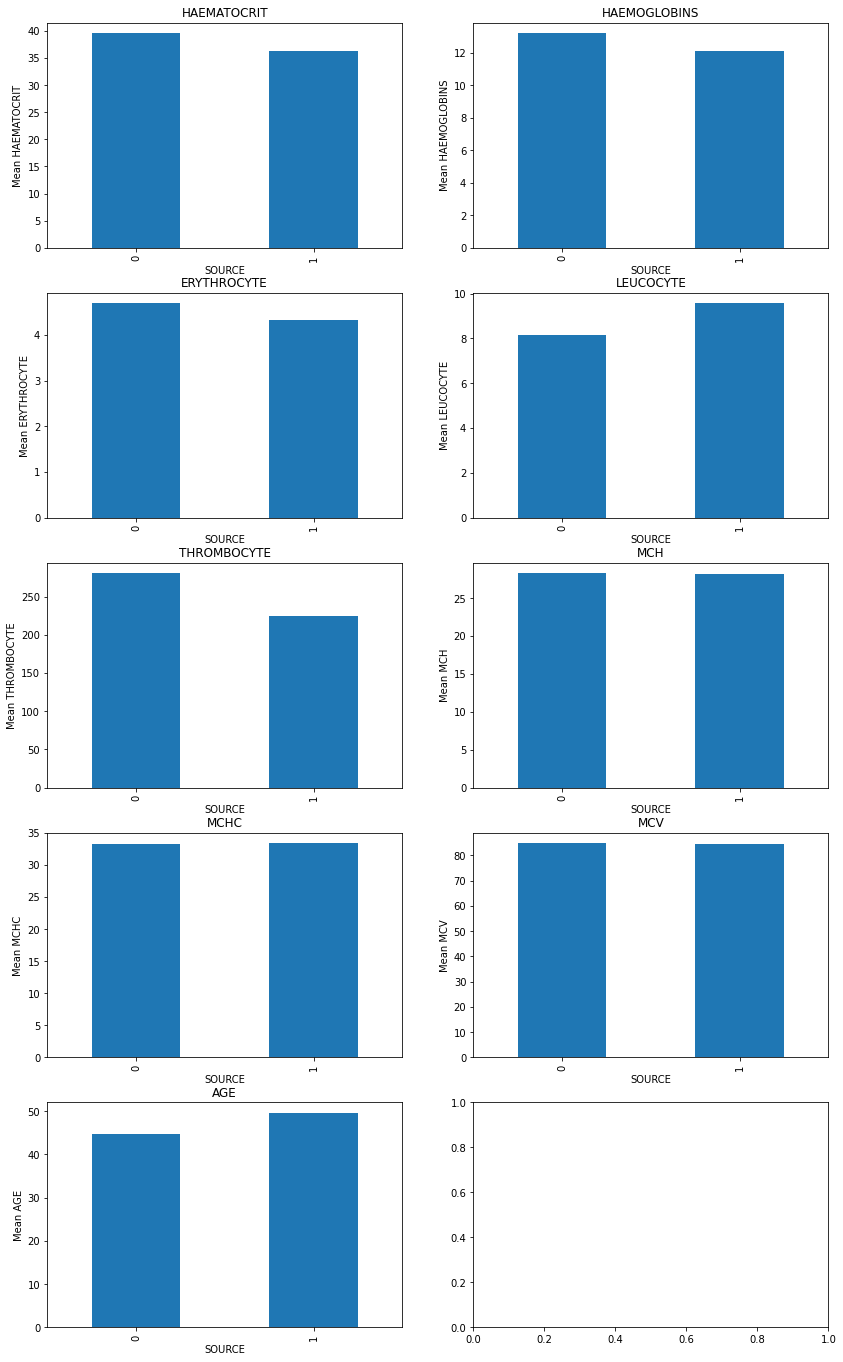

In [17]:
# Relationship between target and mean of each numerical features

fig, axes = plt.subplots(5,2, figsize=(14,24))
axes = [x for axes_row in axes for x in axes_row]
for i,c in enumerate(data[num_feat]):
    df = data.groupby("SOURCE")[c].mean()
    plot = df.plot(kind='bar', title=c, ax=axes[i], ylabel=f'Mean {c}')

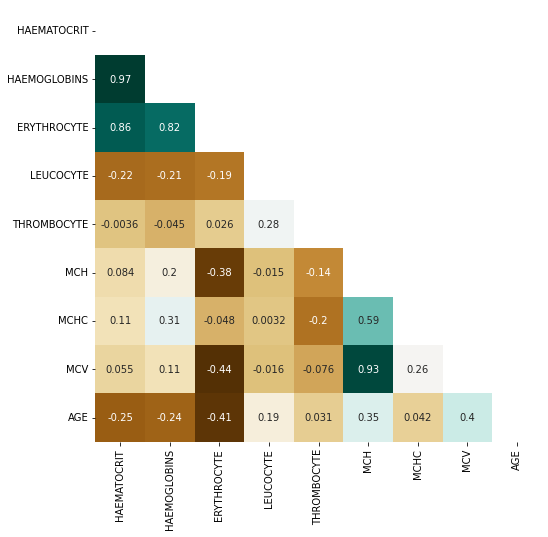

In [18]:
corr_matt = data[num_feat].corr(method='pearson')
matrix = np.triu(corr_matt)
plt.figure(figsize=(8,8))
corr = sns.heatmap(corr_matt, annot=True, mask = matrix,cmap='BrBG', cbar=False)

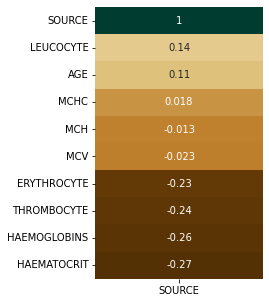

In [19]:
# Pearson's Correlation of features w.r.t target

corr_matt = data.corr()[['SOURCE']].sort_values(by='SOURCE',ascending=False)
plt.figure(figsize=(3,5))
corr = sns.heatmap(corr_matt, annot=True, cmap='BrBG', cbar=False)

In [20]:
x['SEX'] = x['SEX'].replace({'F': 0, 'M': 1})

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=1)

In [22]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train[num_feat] = scaler.fit_transform(x_train[num_feat]) #fit and transform the train set
x_test[num_feat] = scaler.transform(x_test[num_feat]) #transform the test test

In [23]:
x_train.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
2275,1.521571,0.918324,4.205082,-0.507635,-0.368181,-3.543672,-1.886871,-3.523787,0.113088,0
4093,-0.590225,-0.613524,-0.673427,-0.468456,-0.184678,0.106741,-0.267275,0.263954,1.411455,0
1727,-1.512041,-1.618799,-1.463160,0.099634,1.195966,-0.228501,-0.996093,0.191392,-0.350615,0
615,0.817639,0.870454,0.765924,-0.488046,-0.140986,0.032243,0.380563,-0.127881,-1.138910,1
1610,0.348351,0.391752,-0.036546,-0.311742,0.260973,0.665478,0.299583,0.670302,-0.443356,0


### **Feature Selection**

In [24]:
# Remove least correlated features

x_train.drop(['MCH', 'MCHC','MCV'], axis=1, inplace=True)
x_test.drop(['MCH', 'MCHC','MCV'], axis=1, inplace=True)

# final train set
x_train.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,AGE,SEX
2275,1.521571,0.918324,4.205082,-0.507635,-0.368181,0.113088,0
4093,-0.590225,-0.613524,-0.673427,-0.468456,-0.184678,1.411455,0
1727,-1.512041,-1.618799,-1.463160,0.099634,1.195966,-0.350615,0
615,0.817639,0.870454,0.765924,-0.488046,-0.140986,-1.138910,1
1610,0.348351,0.391752,-0.036546,-0.311742,0.260973,-0.443356,0


### **Machine Learning**

In [25]:
models = {
    "Logistic Regression": LogisticRegression(),
    "      Decision Tree": DecisionTreeClassifier(),
    "      Random Forest": RandomForestClassifier(),
    "     Neural Network": MLPClassifier(),
    "  Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    print(name + " trained.")

Logistic Regression trained.
      Decision Tree trained.
      Random Forest trained.
     Neural Network trained.
  Gradient Boosting trained.


In [26]:
acy =[]
for name, model in models.items():
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acy.append(acc)
    print(name + " Accuracy: {:.2f}%".format(acc * 100))

Logistic Regression Accuracy: 71.45%
      Decision Tree Accuracy: 64.73%
      Random Forest Accuracy: 73.94%
     Neural Network Accuracy: 74.09%
  Gradient Boosting Accuracy: 73.19%


<AxesSubplot:>

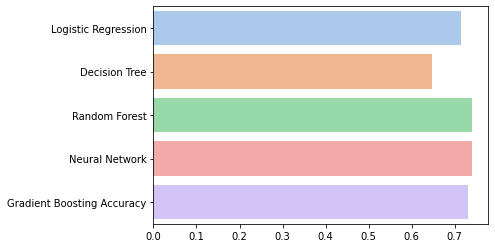

In [27]:
key=['Logistic Regression','Decision Tree','Random Forest','Neural Network','Gradient Boosting Accuracy']
sns.barplot(x = acy, y = key, palette='pastel')